# Programming with Python

[Programming with Python course](https://swcarpentry.github.io/python-novice-inflammation/) by Software Carpentry.

## Python Fundamentals

* Basic data types in Python include integers, strings, and floating-point numbers.
* Use `variable = value` to assign a value to a variable in order to record it in memory.
* Variables are created on demand whenever a value is assigned to them.
* Use `print(something)` to display the value of `something`.
* Built-in functions are always available to use.

## Analysing Patient Data

Load `NumPy` and use the function call `np.loadtxt()` to load `inflammation-01.csv`, which contains to arthritis patients' inflammation data where each row are data for each individual patient and the columns are their daily inflammation measurements.

In [1]:
import numpy as np
data = np.loadtxt(fname = '../data/swc/inflammation-01.csv', delimiter=',')
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


Data type using `type()`.

In [2]:
print(type(data))

<class 'numpy.ndarray'>


The `type()` function will only tell you that a variable is a `NumPy` array but not the type of values stored in the array. A NumPy array contains elements of the same type; use `dtype` to find out the type of data stored inside an array.

In [3]:
print(data.dtype)

float64


`data.shape` is an attribute of `data` that describes dimensions of `data` (60 patients with data for 40 days).

In [4]:
print(data.shape)

(60, 40)


Get first value (cell in first row and first column) using an index with square brackets.

In [5]:
print(data[0, 0])

0.0


An array slice from the first row to the fifth and first column to the fifth.

In [6]:
print(data[0:5, 0:5])

[[0. 0. 1. 3. 1.]
 [0. 1. 2. 1. 2.]
 [0. 1. 1. 3. 3.]
 [0. 0. 2. 0. 4.]
 [0. 1. 1. 3. 3.]]


We do not need to include the lower or upper bounds when slicing; Python will do this find the lowest and highest possible values when we do not specify the limits.

In [7]:
print(data[:5, 35:])

[[4. 2. 3. 0. 0.]
 [5. 1. 1. 0. 1.]
 [3. 2. 2. 1. 1.]
 [4. 2. 3. 2. 1.]
 [4. 2. 0. 1. 1.]]


Calculating the mean of entire array.

In [8]:
print(np.mean(data))

6.14875


Multiple assignment of descriptive statistics. Note to get more information about a function, add `?` to the end of the function, e.g. `np.std?`; this is the same as using `help(np.std)`.

In [9]:
maxval, minval, stdval = np.max(data), np.min(data), np.std(data)
print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.613833197118566


Calculate just for patient 1.

In [10]:
print(np.max(data[0, :]))

18.0


Calculate for all patients by using `axis = 1`. Axis 1 refers to the columns and we are calculating _across_ the columns.

In [11]:
print(np.max(data, axis = 1).shape)
print(np.max(data, axis = 1))

(60,)
[18. 18. 19. 17. 17. 18. 17. 20. 17. 18. 18. 18. 17. 16. 17. 18. 19. 19.
 17. 19. 19. 16. 17. 15. 17. 17. 18. 17. 20. 17. 16. 19. 15. 15. 19. 17.
 16. 17. 19. 16. 18. 19. 16. 19. 18. 16. 19. 15. 16. 18. 14. 20. 17. 15.
 17. 16. 17. 19. 18. 18.]


Calculate per day by using `axis = 0`. Axis 0 refers to the rows and we are calculating _across_ the rows.

In [12]:
print(np.max(data, axis = 0).shape)
print(np.max(data, axis = 0))

(40,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.
  4.  3.  2.  1.]


Slicing strings.

In [13]:
element = 'oxygen'
print(element[0:3])

oxy


Last index using negative value.

In [14]:
print(element[-2])

e


Stacking arrays using `hstack` and `vstack`, which are like `cbind` and `rbind` in R.

In [15]:
A = np.array(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)
print('A = ', "\n", A, "\n")

B = np.hstack([A, A])
print('B = ', "\n", B, "\n")

C = np.vstack([A, A])
print('C = ', "\n", C, "\n")

A =  
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

B =  
 [[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]] 

C =  
 [[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]] 



The `np.diff()` function takes an array and returns the difference between two successive values (as in R).

In [16]:
patient3_week1 = data[3, :7]
print(patient3_week1)
print(np.diff(patient3_week1))

[0. 0. 2. 0. 4. 2. 2.]
[ 0.  2. -2.  4. -2.  0.]


Calculating `np.diff` for all patients.

In [17]:
np.diff(data, axis = 1)

array([[ 0.,  1.,  2., ...,  1., -3.,  0.],
       [ 1.,  1., -1., ...,  0., -1.,  1.],
       [ 1.,  0.,  2., ...,  0., -1.,  0.],
       ...,
       [ 1.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0.,  0.,  1., ..., -2.,  2., -2.],
       [ 0.,  1., -1., ..., -2.,  0., -1.]])

Largest change in inflammation for each patient.

In [18]:
np.max(np.diff(data, axis = 1), axis = 1)

array([ 7., 12., 11., 10., 11., 13., 10.,  8., 10., 10.,  7.,  7., 13.,
        7., 10., 10.,  8., 10.,  9., 10., 13.,  7., 12.,  9., 12., 11.,
       10., 10.,  7., 10., 11., 10.,  8., 11., 12., 10.,  9., 10., 13.,
       10.,  7.,  7., 10., 13., 12.,  8.,  8., 10., 10.,  9.,  8., 13.,
       10.,  7., 10.,  8., 12., 10.,  7., 12.])

* Import a library into a program using `import libraryname`.
* Use the `numpy` library to work with arrays in Python.
* The expression `array.shape` gives the shape of an array.
* Use `array[x, y]` to select a single element from a 2D array.
* Array indices start at 0, not 1.
* Use `low:high` to specify a slice that includes the indices from low to high-1.
* Use `#` to add comments to programs.
* Use `numpy.mean(array)`, `numpy.max(array)`, and `numpy.min(array)` to calculate simple statistics.
* Use `numpy.mean(array, axis=0)` or `numpy.mean(array, axis=1)` to calculate statistics across the specified axis.

## Visualising Tabular Data

Python's `matplotlib` is the _de facto_ plotting library. Here we will use the `pyplot` module from `matplotlib` and use two of its functions to create and display a heat map. Each row of the heat map corresponds to a single patient and each column a day. Blue pixels represent low values and yellow pixels represent high values. The heat map shows that the general number of inflammation flare-ups for the patients rises and falls over a 40-day period.

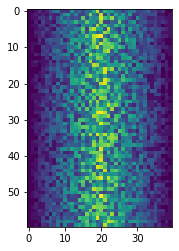

In [20]:
from matplotlib import pyplot as plt
image = plt.imshow(data)
plt.show()

Average inflammation per day across all patients.

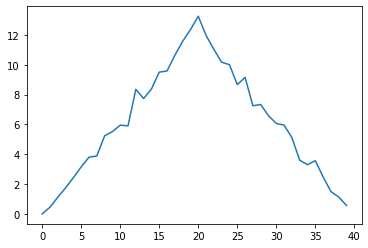

In [22]:
ave_inflammation = np.mean(data, axis = 0)
ave_plot = plt.plot(ave_inflammation)
plt.show()

Max inflammation per day across all patients.

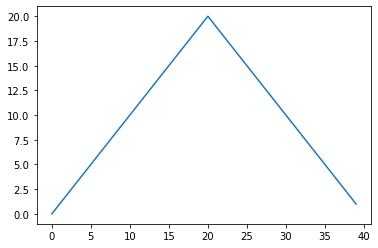

In [23]:
max_plot = plt.plot(np.max(data, axis = 0))
plt.show()

Minimum inflammation per day across all patients.

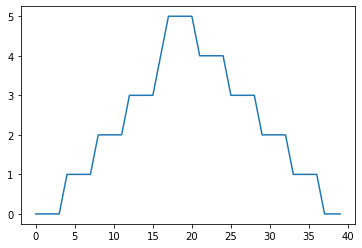

In [24]:
min_plot = plt.plot(np.min(data, axis = 0))
plt.show()

Group plot into a single figure using subplots. The function `plt.figure()` creates a space for the plots and the parameter `figsize` indicates the size of the space. Each subplot is added by using `add_subplot`, which takes three parameters (number of rows, number of columns, and plot index). Each subplot is stored in a different variable (`axes1`, `axes2`, and `axes3`).

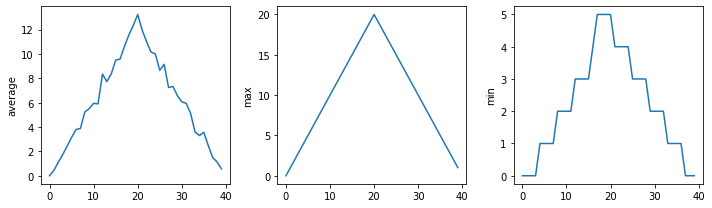

In [28]:
fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0))

fig.tight_layout()

# to save as PNG
# plt.savefig('inflammation.png')

plt.show()

## Storing Multiple Values in Lists

Lists are a way to store multiple values together and are a built-in data structure in Python. Lists are created by using square brackets.

In [59]:
odd_no = [1, 3, 5, 7]
print(odd_no)

[1, 3, 5, 7]


Indexing.

In [31]:
print(odd_no[0])
print(odd_no[-1])

1
7


Lists are mutable.

In [34]:
names = ['Curie', 'Darrr', 'Franklin']
names[1] = 'Darwin'
print(names)

['Curie', 'Darwin', 'Franklin']


Use the `list` function to create a copy of another list; assignment simply refers to the same list in memory.

In [36]:
x = [1, 2, 3]
x1 = x
x[0] = 0
print(x1)

x = [1, 2, 3]
x1 = list(x)
x[0] = 0
print(x1)

[0, 2, 3]
[1, 2, 3]


Nested lists.

In [37]:
x = [['pepper', 'zucchini', 'onion'],
     ['cabbage', 'lettuce', 'garlic'],
     ['apple', 'pear', 'banana']]

First list.

In [43]:
print(x[0])

['pepper', 'zucchini', 'onion']


List of list containing first list.

In [44]:
print([x[0]])

[['pepper', 'zucchini', 'onion']]


First item of first list.

In [45]:
print(x[0][0])

pepper


Python lists can contain different data types, i.e. heterogeneous lists.

In [46]:
ages = [1, 2, 'Unknown']
print(ages)

[1, 2, 'Unknown']


Append to a list.

In [63]:
odd_no = [1, 3, 5, 7]
odd_no.append(11)
print(odd_no)

[1, 3, 5, 7, 11]


Pop (remove last element by default) a list.

In [66]:
odd_no = [1, 3, 5, 7]
removed = odd_no.pop()
print(removed)
print(odd_no)

7
[1, 3, 5]


Pop can be used with an index for removing a specific item.

In [67]:
odd_no = [1, 3, 5, 7]
removed = odd_no.pop(1)
print(removed)
print(odd_no)

3
[1, 5, 7]


Reverse a list.

In [71]:
odd_no = [1, 3, 5, 7]
odd_no.reverse()
print(odd_no)

[7, 5, 3, 1]


List slicing is the same as slicing a `NumPy` array.

In [72]:
chr = [1, 2, 3, 'X', 'Y']
print(chr[3:])

['X', 'Y']


Slicing from the end.

In [76]:
string_for_slicing = 'Observation date: 02-Feb-2013'
print(string_for_slicing[-4:])

list_for_slicing = [['fluorine', 'F'],
                    ['chlorine', 'Cl'],
                    ['bromine', 'Br'],
                    ['iodine', 'I'],
                    ['astatine', 'At']]

print(list_for_slicing[-4:])

2013
[['chlorine', 'Cl'], ['bromine', 'Br'], ['iodine', 'I'], ['astatine', 'At']]


Non-continuous slices where the third argument is the step size.

In [80]:
x = list(range(0, 11))
print(x[::2])

[0, 2, 4, 6, 8, 10]


Concatenate using `+`.

In [85]:
x = list(range(0, 11))
print(x + [11, 12])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Repeat using `*`.

In [87]:
x = list(range(0, 11))
print(x * 2)
print(x + x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


* `[value1, value2, value3, ...]` creates a list.
* Lists can contain any Python object, including lists (i.e., list of lists).
* Lists are indexed and sliced with square brackets (e.g., list[0] and list[2:9]), in the same way as strings and arrays.
* Lists are mutable (i.e., their values can be changed in place).
* Strings are immutable (i.e., the characters in them cannot be changed).